# Интернет-магазин "Витрина". Исследование гипотез по изменению сайта, проведение A/B тестов и анализ их результатов

Вместе с отделом маркетинга мы подготовили ряд гипотез, которые должны привести к увеличению выручки.\
Предоставлены подробные данные о гипотезах, которые позволят провести их приоритизацию, оценив требуемые усилия и потенциальный рост выручки в случае внедрения гипотезы.\
Помимо информации о гипотезах имеются данные о пользователях в двух группах теста - A и B, их заказах и посещениях сайта.

## Поставленные вопросы

**Приоритизация гипотез**
1. Какие гипотезы наиболее приоритетны с точки зрения фреймворков ICE и RICE? 
2. Как изменяется приоритизация при использовании разных фреймворков?

**Анализ результатов A/B-теста. Визуализация, выводы и предположения**\
Какое решение стоит принять по результатам теста? Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

## Ход исследования

Данные для анализа я получаю из файлов:
- гипотезы: `/datasets/hypothesis.csv`. Содержит информацию о 9 гипотезах по увеличению выручки интернет-магазина, включая параметры  Reach, Impact, Confidence, Effort.
- заказы: `/datasets/orders.csv`. Включает информацию о покупках пользователей с указанием суммы, даты и группы теста - А или В.
- посетители: `/datasets/visitors.csv`. Включает суммарное количество посещений сайта на каждый день теста с указанием группы.

О качестве данных ничего не известно, поэтому я выполню их предобработку.\

После этого я проведу приоритизацию гипотез, применяя фреймворки ICE и RICE, а также выясню, как меняется приоритизация при использовании разных фреймворков.\
Во второй части исследования я проведу анализ результатов A/B-теста. Он будет состоять из расчета кумулятивной выручки и среднего чека по группам и изучу относительное изменение кумулятивного среднего чека группы В по отношению к группе А. Далее построю график кумулятивного среднего количества заказов на посетителя по группам, после чего также изучу относительное изменение кумулятивного среднего количества заказов на посетителя группы В по отношению к группе А.\
Далее я исследую количество заказов по пользователям и стоимость этих заказов, чтобы определить границы анализа, отсечь аномалии и в дальнейшем провести расчёт по "очищенным" данным.\
После этих действий я посчитаю статистическую значимость различий в среднем количестве заказов на посетителя между группами, а также статистическую значимость различий в среднем чеке заказа между группами - высчитывать буду по "сырым" данным.\
Когда статистическая значимость различий по "сырым" данным будет посчитана, я сделаю то же самое по "очищенным" данным.\
В завершении исследования я приму решение по результатам теста и объясню его, после чего подведу итоги.

Таким образом, моё исследование пройдёт в **17** этапов:

1.Изучение и предобработка данных.\
2.Приоритизация гипотез с применением фреймворков ICE и RICE.

**Построение графиков**\
3. Кумулятивная выручка по группам.\
4. Кумулятивный средний чек по группам.\
5. Относительное изменение кумулятивного среднего чека группы B к группе A.\
6. Кумулятивное среднее количество заказов на посетителя по группам.\
7. Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A.

**Определение границ анализа и поиск аномалий**\
8. Точечный график количества заказов по пользователям.\
9. 95-й и 99-й перцентили количества заказов на пользователя.\
10. Точечный график стоимостей заказов.\
11. 95-й и 99-й перцентили стоимости заказов.

**Подсчет статистической значимости различий**\
12. Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. \
13. Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. \
14. Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.\
15. Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

16. Принятие решения по результатам теста и объяснение.
17. Подведение итогов

# Изучение и предобработка данных

Перед началом работы импортирую все необходимые для исследования библиотеки.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as st

Загружаю данные о гипотезах, заказах и посетителях, и изучаю информацию о таблицах.

In [2]:
try:
    hypot = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    hypot = pd.read_csv('hypothesis.csv')
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')

Сразу привожу названия колонок таблиц к строковым, а также вывожу уникальные значения групп теста,\
чтобы исключить наличие ошибочных символов кроме А и В.

In [3]:
for i in [hypot, orders, visitors]:
    i.columns = i.columns.str.lower()
    if i is hypot:
       print(i.info()) 
    else:
       print(i.info())
       print()
       print('уникальные значения групп:') 
       print (i['group'].value_counts()) 
       print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  1197 non-null   int64 
 1   visitorid      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None

уникальные значения групп:
B    640
A    557
Name: group, dtype: int64

<class 'pandas.core.fram

Пропуски во всех таблицах отсутствуют, названия групп также соответствуют описанию, "лишних" названий нет.\
Все столбцы, содержащие цифры, имеют необходимый для работы тип int.\
Формат колонок с датой не соответствует нужному, я приведу их к нужному типу в ходе исследования.\
Проверяю таблицы (кроме гипотез) на полные дубликаты:

In [4]:
for q in [[orders,'заказы'], [visitors, 'посетителей']]:
    dub = q[0].duplicated().sum()
    print(f'количество строк-дубликатов в таблице, содержащей {q[1]}: {dub}')

количество строк-дубликатов в таблице, содержащей заказы: 0
количество строк-дубликатов в таблице, содержащей посетителей: 0


Готово, полных дубликатов не обнаружено.\
При этом дубликаты значений в столбцах могут попадаться, это нормально, учитывая характер данных.\
Дополнительно просматриваю первые строки таблиц orders и visitors.

In [5]:
display (visitors.head(), orders.head())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Всё в порядке, перехожу к изучению гипотез.

# Приоритизация гипотез. ICE и RICE

Просматриваю список гипотез и их метрик.

In [6]:
pd.set_option("display.max_colwidth", None)
hypot

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Рассчитываю ICE и RICE, записывая эти метрики в новые колонки, и сортирую по ICE в порядке убывания, а после этого - по RICE в порядке убывания, чтобы сравнить результат.

In [7]:
hypot['ICE'] =  (hypot['impact'] * hypot['confidence'] / 
                 hypot['efforts']).round(1)
hypot['RICE'] = (hypot['impact'] * hypot['confidence'] * hypot['reach'] / 
                 hypot['efforts']).round(1)

hypot.sort_values('ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


In [8]:
hypot.sort_values('RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


Заметно, что порядок изменился после применения RICE.\
Причина заключается в том, что оба показателя вычисляются на одних и тех же метриках в одном и том же порядке: Impact(влияние) умножается на Confidence(уверенность в оценке) и делится на Efforts(трудозатраты). Такова формула ICE. Однако при подсчете RICE результат умножается также на Reach(охват), то есть этот показатель RICE, в отличие от ICE, учитывает, сколько конечных пользователей затронет внедрение гипотезы.\
Именно поэтому приоритизация по ICE и по RICE отличается.

**Вывод**: Если оценивать приоритет внедрения гипотез без учёта охвата конечных пользователей - то в первую очередь стоит уделить внимание гипотезе "Запустить акцию, дающую скидку на товар в день рождения".\
Если принять во внимание охват конечных пользователей, на которых повлияют изменения, то первое место по приоритету - у гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

Приоритизация гипотез проведена, перехожу к анализу результатов A/B-теста.

# Предобработка результатов А/В - теста

Перед изучением результатов теста нужно проверить корректность выборки.\
В данных могут встречаться пользователи, которые попали сразу в обе группы теста. Проверяю это и считаю их количество:

In [9]:
doubleusers = orders.groupby('visitorid', as_index=False).agg({'group':'nunique'}).query('group > 1')['visitorid']
doubleuserstotal = doubleusers.count()
perc = (doubleuserstotal / orders['visitorid'].count() * 100).round(2)
print(f'количество пользователей, попавших одновременно в две группы: {doubleuserstotal}.')
print(f'Такие пользователи составляют {perc}% от всех пользователей в тесте.')

количество пользователей, попавших одновременно в две группы: 58.
Такие пользователи составляют 4.85% от всех пользователей в тесте.


В данных действительно есть пользователи, которые попали в две выборки сразу. Их процент составляет менее 5%, это небольшое значение, и я отсекаю их от анализа - поскольку они могут серьезно повлиять на результаты исследования.

In [10]:
orders = orders.loc[~orders['visitorid'].isin(doubleusers)]

Стоит отметить, что в таблице с посетителями данные агрегированы, то есть за каждую дату указано суммарное количество посетителей без указания их id. По этой причине не удастся отсечь пользователей, попавших одновременно в обе группы, от общего количества посетителей за дату, но стоит это учитывать.

При этом изначальное соотношение количества пользователей в группах не изменится, потому что я исключил только тех, кто был в двух группах одновременно.

# График кумулятивной выручки по группам

Для подсчёта привожу колонки таблицы orders с датой к нужному формату.

In [11]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

Готово, теперь строю график:

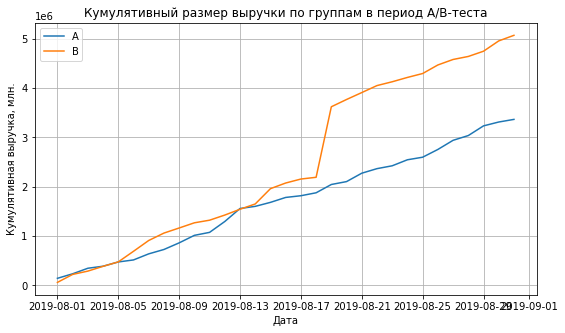

In [12]:
# создаю массив уникальных пар значений группы и времени
datesGroups = orders[['date', 'group']].drop_duplicates()

# Агрегирую заказы и получаю таблицу orders с выручкой с накоплением по дням
ordersAggregated = (
    datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                     .agg({'date':'max', 'group':'max', 'transactionid':'nunique', 'visitorid':'nunique', 'revenue':'sum'}), axis=1)
                         .sort_values(by=['date', 'group'])
)
# Аналогично получаю количество посетителей visitors с накоплением по дням
visitorsAggregated = (
    datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                     .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1)
                        .sort_values(by=['date', 'group'])
)
visitorsAggregated

# Объединяю две таблицы в одну, прописываю названия столбцов

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData

# создаю датайфреймы по группам в отдельности

cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

# строю графики
plt.figure(figsize=(9,5))
plt.title('Кумулятивный размер выручки по группам в период A/B-теста')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка, млн.')
plt.grid()
plt.plot(cumulativeRevenueA['date'].to_numpy(), cumulativeRevenueA['revenue'].to_numpy(), label='A')
plt.plot(cumulativeRevenueB['date'].to_numpy(), cumulativeRevenueB['revenue'].to_numpy(), label='B')
plt.legend();

Кумулятивный размер выручки почти равномерно растёт в обеих группах, это хороший знак. Однако, у группы B заметен резкий скачок кумулятивной выручки в середине августа 2019 года. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке, их я изучу далее.

**Вывод**: кумулятивная выручка у обеих групп растет в целом равномерно, однако у группы В заметен резкий скачок выручки в середине августа 2019 г.

# График кумулятивного среднего чека по группам

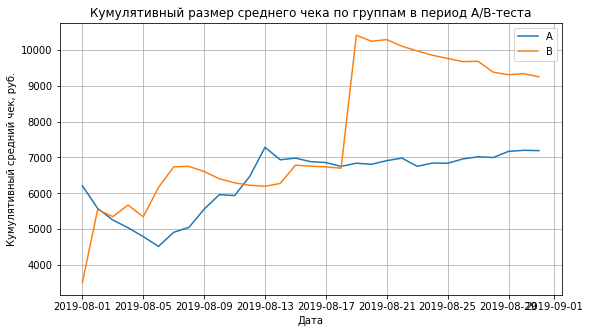

In [13]:
plt.figure(figsize=(9,5))
plt.title('Кумулятивный размер среднего чека по группам в период A/B-теста')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек, руб.')
plt.grid()
 
plt.plot(cumulativeRevenueA['date'].to_numpy(), (cumulativeRevenueA['revenue']/cumulativeRevenueA['orders']).to_numpy(), label='A')
plt.plot(cumulativeRevenueB['date'].to_numpy(), (cumulativeRevenueB['revenue']/cumulativeRevenueB['orders']).to_numpy(), label='B')
plt.legend();

У группы А график кумулятивного среднего чека падает, после растёт и стабилизируется во 2 половине проведения теста.\
У группы В - в первой половине теста график растёт заметнее, чем у группы А, а в середине августа снова наблюдается резкое увеличение среднего чека

**Вывод**: У группы B рост среднего чека имеет более заметный вид, чем у группы А. При этом у группы В в августе был резкий рост среднего чека, причина неясна - возможно, в эту группу в целом попали более крупные заказы.\
Изучаю относительный средний чек по группам.

# График относительного среднего чека по группам

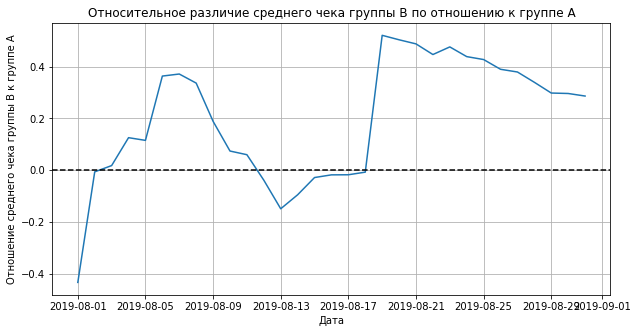

In [14]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,5))
plt.title('Относительное различие среднего чека группы B по отношению к группе А')
plt.xlabel('Дата')
plt.ylabel('Отношение среднего чека группы В к группе А')
plt.grid()
 
# cтрою отношение средних чеков
plt.plot(
           mergedCumulativeRevenue['date'].to_numpy(), 
         ((mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
          (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
         .to_numpy()
        )

# добавляю ось X
plt.axhline(y=0, color='black', linestyle='--');

В нескольких точках средний чек по группе B значительно превышает средний чек по группе А, возможно, дело в выбросах или абсолютно крупных заказах. Однако картина в целом такова, что большую часть времени проведения теста средниий чек по группе В относительно больше среднего чека по группе А.

**Вывод**: на графике отношение среднего чека по группе В к группе А достигает высоких значений, заметно выше нуля. Это может быть связано как с аномалиями и выбросами, так и с хорошими результатами по тесту.

# График кумулятивного среднего количества заказов на одного пользователя

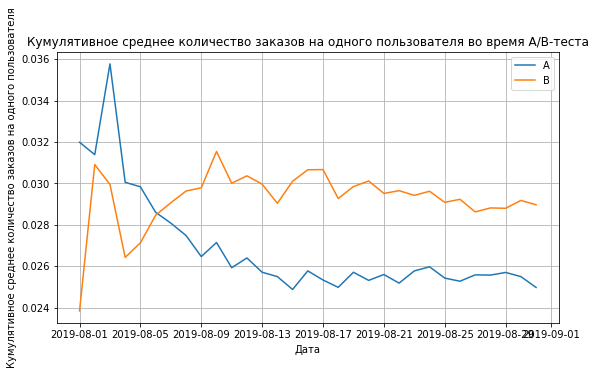

In [15]:
# рассчитываю конверсию (среднее количество заказов на посетитетля)
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

# разделяю по группам
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

# строю графики

plt.figure(figsize=(9,5))
plt.title('Кумулятивное среднее количество заказов на одного пользователя во время A/B-теста')
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее количество заказов на одного пользователя')
plt.grid()
plt.plot(cumulativeDataA['date'].to_numpy(), cumulativeDataA['conversion'].to_numpy(), label='A')
plt.plot(cumulativeDataB['date'].to_numpy(), cumulativeDataB['conversion'].to_numpy(), label='B')
plt.legend();

Из графика хорошо заметно, что к середине теста кумулятивное среднее количество заказов стабилизировалось, и у группы В оно держится на заметно более высоком уровне, чем у группы А.\
**Вывод:** Кумулятивное среднее количество заказов на одного пользователя группы В держится на заметно более высоком уровне, чем на пользователя группы А. Это играет роль в пользу группы В.

Теперь строю график относительного изменения этой величины на посетителя группы В к группе А.

# График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

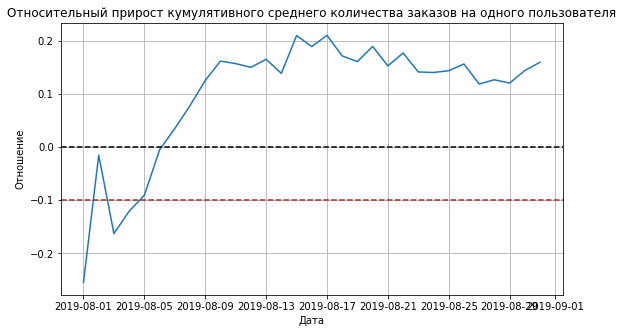

In [16]:
# объединяю таблицы с конверсией по группам в одну таблицу
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
                              cumulativeDataB[['date','conversion']], left_on='date', 
                                                                      right_on='date', how='left', 
                                                                      suffixes=['A', 'B'])


plt.figure(figsize=(9,5))
plt.title('Относительный прирост кумулятивного среднего количества заказов на одного пользователя')
plt.xlabel('Дата')
plt.ylabel('Отношение')
plt.grid();
# строю график
plt.plot(mergedCumulativeConversions['date'].to_numpy(), 
         (mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1).to_numpy())
         


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='brown', linestyle='--');



Заметно, что в начале теста среднее количество заказов на одного пользователя группы В было ниже, чем у группы А, но потом это количество заметно выросло гораздо больше, чем у группы А. За этим следовал небольшой спад, но сейчас группа В все ещё выигрывает.\
В начале теста есть короткий всплеск среднего количества заказов группы В, возможно, это связано с аномалиями.\
**Вывод:** группа В имела меньшее среднее количество заказов на одного пользователя, но к середине теста это количество заметно превысило среднее количество для пользователя группы А.\
Это хороший признак, однако странные "пики" на этом и остальных графиках говорят о наличии аномалий, поэтому займусь ими.

# Исследование аномалий

Для того, чтобы изучать очищенные данные, нужно определить границы анализа. Для этого использую несколько методов.

## Точечный график количества заказов по пользователям. Перцентили

Такой график хорошо позволяет отследить наличие аномалий.\
Создаю таблицу, содержащую общее количество заказов каждого пользователя в тесте, и строю точечный график.

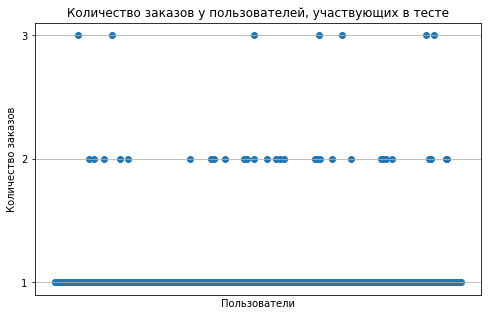

In [17]:
ordersUsers = orders.groupby('visitorid', as_index=False).agg({'transactionid':'nunique'})
ordersUsers.columns = ['userid', 'orders']
plt.figure(figsize=(8,5))
plt.title('Количество заказов у пользователей, участвующих в тесте')

plt.xticks([])
plt.yticks(range(0, 12, 1))
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.grid('x')
x_values = pd.Series(range(0,len(ordersUsers)))
plt.scatter(x_values, ordersUsers['orders']);

Каждой точке соответствует пользователь, его положение на оси y указывает на количество заказов.\
Заметно, что большинство пользователей делают 1-2 заказа. Для более точного анализа "большинства" нахожу перцентили количества заказов на одного пользователя:

In [18]:
print('95-й и 99-й перцентили количества заказов на пользователя:')
print(np.percentile(ordersUsers['orders'], [95, 99])) 

95-й и 99-й перцентили количества заказов на пользователя:
[1. 2.]


Исходя из 95 и 99 перцентилей **устанавливаю границу для анализа - 1 заказ на одного пользователя.**

## Точечный график стоимости заказов и перцентили

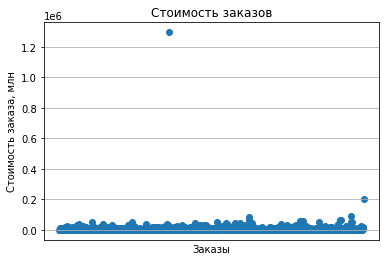

In [19]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.xticks([])
plt.title('Стоимость заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказа, млн')
plt.grid('x')
plt.scatter(x_values, orders['revenue']);

На этом графике заметен аномальный заказ, стоимость которого превысила 1.2 млн, в то время как остальные заказы не превышают 200 тысяч. Возможно, он повлиял на результаты подсчетов, поэтому важно отсечь этот выброс. Кроме того, есть аномальный заказ более чем на 200 тысяч, он всего один. Изучаю перцентили. 

In [20]:
print('95-й и 99-й перцентили стоимости одного заказа:')
print(np.percentile(orders['revenue'], [95, 99])) 

95-й и 99-й перцентили стоимости одного заказа:
[26785. 53904.]


Исходя из перцентилей **выбираю границу анализа в 26 785 рублей за один заказ.**

**Вывод:** в данных есть несколько аномалий, однако большинство пользователей в тесте делают не более одного заказа, а стоимость этого заказа не превышает 26 785 рублей.

Я оценил результаты A/B-теста визуально, а также определил границу аномалий. Можно переходить к подсчёту статистической значимости выявленных различий между группами.

# Cтатистическая значимость различий по «сырым» данным

## Среднее число заказов на пользователя

Сформулирую гипотезы.\
Н0: различий в среднем количестве заказов между группами нет.\
Н1: различия в среднем между группами есть.\
Уровень статистической значимости - **0.05%**.

Создаю датафрейм, в котором объединяю все интересующие метрики по обоим группам.

In [21]:
# создаю таблицы по группам, где прописано кол-во посетителей на каждую дату, а также
# кумулятивное количество посетителей на каждую дату
# группа А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsACumulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
    {'date':'max', 'visitorsPerDateA':'sum'}), axis=1)
visitorsACumulative.columns = ['date', 'visitorsCummulativeA']

# группа В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
visitorsBCumulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
    {'date':'max', 'visitorsPerDateB':'sum'}), axis=1)
visitorsBCumulative.columns = ['date', 'visitorsCummulativeB']

# Аналогично создаю 2 таблицы по группам с количеством заказов и размеров выручки на каждую дату,
# а также с кумулятивной выручкой и кумулятивным кол-вом заказов на каждую дату

# группа А

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACumulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACumulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

# группа В

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCumulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCumulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

# Объединяю все полученные таблицы в единую и выводу на экран

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACumulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCumulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACumulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCumulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Готово, данные получены. Теперь группирую таблицу с заказами по пользователям, а также вводу переменные sampleA и sampleB, соответствующие количеству заказов пользователей, включая нули у тех, кто ничего не заказывал.

In [22]:
# разделяю заказы пользователей по группам
ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitorid', 
                                                        as_index=False).agg({'transactionid':'nunique'})
ordersByUsersA.columns = ['userid', 'orders']

ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitorid', 
                                                        as_index=False).agg({'transactionid':'nunique'})
ordersByUsersB.columns = ['userid', 'orders']

# считаю количество заказов у пользователей
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Готово, теперь осталось посчитать p-value, а также среднее количество заказов группы В относительно группы А.

In [23]:
pvalue = ("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
meanm = ("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
print(f'P-value равен {pvalue}')
print()
print(f'Отношение средних В относительно группы А: {meanm}')

P-value равен 0.011

Отношение средних В относительно группы А: 0.160


P-value меньше уровня статистической значимости - значит, стоит отвергнуть нулевую гипотезу: различия в среднем количестве заказов по группам есть. При этом относительный "выигрыш" группы В составляет 16%.

**Вывод:** Между группами есть различия в среднем числе заказов на одного пользователя, у группы В оно больше, чем у группы А,  на 16%.

## Разница в средних чеках

Теперь считаю эти показатели для средних чеков, используя таблицу с заказами.
Нулевая гипотеза: различий в среднем чеке между группами нет.\
Альтернативная: различия в среднем чеке между группами есть.\
Уровень статистической значимости - **0.05%**.

In [24]:
pval = ('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
mnn = ('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 
print(f'P-value равен {pval}')
print()
print(f'Отношение средних чеков В относительно группы А: {mnn}')

P-value равен 0.829

Отношение средних чеков В относительно группы А: 0.287


Наблюдаемое различие в 26% между группами не является статистически значимым, поскольку p-value гораздо выше уровня статистической значимости.\
**Вывод:** Нет оснований полагать, что есть значимое статистическое различие в средних чеках между группами.

Теперь очищаю данные от аномалий, границы которых выявил ранее.

# Очистка данных от аномалий

Создаю таблицу, в которую входят все "аномальные" пользователи, то есть те, кто совершил более 2 заказов, а также те, который делал заказ более чем на 26785 рублей.

In [25]:
# объединяю пользователей обоих групп с 2 заказами в одну таблицу
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userid'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userid'],
    ],
    axis=0,
)


# ставлю границу по цене заказа
revenue_lim = np.percentile(orders['revenue'], 95)
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_lim]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])
print((abnormalUsers.shape[0]/orders['visitorid'].nunique() * 100))

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
dtype: int64
58
5.960945529290853


**Вывод:** в данных обнаружено 58 "аномальных" пользователей, они составляют около 6% от общего количества пользователей.

# Статистически значимые различия между группами по очищенным данным

## Среднее количество заказов на пользователя

Теперь провожу те же вычисления, но уже по пользователям, которые остались после очистки от аномалий.\
Нулевая гипотеза: различий в среднем количестве заказов между группами нет.\
Альтернативная: различия в среднем между группами есть.\
Уровень статистической значимости - **0.05%**.

In [26]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

pvalue = ('{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
meanm = ('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

print(f'P-value равен {pvalue}')
print()
print(f'Отношение средних В относительно группы А: {meanm}')

P-value равен 0.012

Отношение средних В относительно группы А: 0.182


Результаты по среднему количеству заказов практически не изменились. P-value по-прежнему меньше уровня стат. значимости, есть основания для отказа от нулевой гипотезы. При этом среднее количество заказов в группе В превышает среднее кол-во заказов в группе А на 19%.\
**Вывод:** есть основания считать, что между группами есть статистически значимое различие в среднем количестве заказов на одного пользователя. При этом в среднем по группе В количество заказов на пользователя больше на 19%, чем по группе А.

## Размер среднего чека

Считаю эти показатели для средних чеков, используя таблицу с заказами.
Нулевая гипотеза: различий в среднем чеке между группами нет.\
Альтернативная: различия в среднем чеке между группами есть.\
Уровень статистической значимости - **0.05%**.

In [27]:
pvalue = (
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

meanm = (
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

print(f'P-value равен {pvalue}')
print()
print(f'Отношение средних В относительно группы А: {meanm}')

P-value равен 0.646

Отношение средних В относительно группы А: -0.048


P-value после очистки от аномалий почти не изменился и вновь выше уровня стат. значимости, а это значит, что нет оснований отвергать нулевую гипотезу - значимого различия в среднем чеке между группами нет. При этом средний чек группы В на 2% меньше чека группы А.

**Вывод:** после очистки данных выводы по среднему количеству заказов на пользователя изменились.
Пользователи в группе в среднем на пользователя имеют на 2% меньший средний чек, однако p-value существенно выше уровня стат. значимости. Это говорит о том, что не стоит отвергать нулевую гипотезу: эта разница в 2% между группами не является статистически значимой.


## Общие выводы

Теперь стоит обобщить все полученные за прошлые этапы выводы.

1. Есть статистически значимое различие в среднем количестве заказов на одного пользователя между группами. Это различие видно и по сырым, и по очищенным от аномалий данным. По сырым данным этот показатель у группы В больше, чем у группы А, на 13%, а по очищенным - больше на 17%.
2. Эта тенденция также подтверждается графиком отношения среднего кол-ва заказов группы В к группе А. Сначала группа В проигрывала, но к середине теста значительно превысика среднее кол-во по группе А. После этого уровень немного снизился, но в настоящий момент - снова растёт.
3. График кумулятивного среднего кол-ва заказов на одного пользователя по группам также показывает преимущество группы В, в начале проигрывая группе А, но к середине теста заметно превышая этот показатель для группы В.


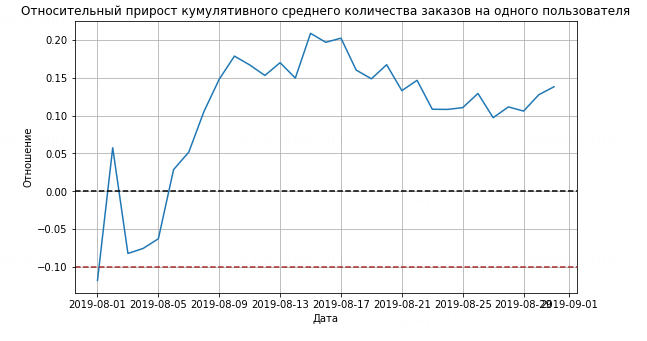

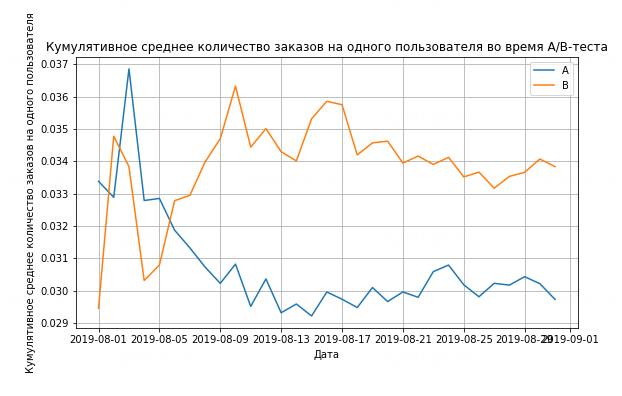

3. Нет статистически значимого различия в размере среднего чека между группами. Это подтверждается как по сырым, так и по очищенным данным.
4. На графике относительного различия среднего чека заметно, что средний чек то превышал чек по группе А, то снова падал ниже. Во второй половине теста он снова начал падать у группы В, и сейчас продолжает снижаться.
5. На графике кумулятивного размера среднего чека группа В имела резкий рост среднего чека, однако это может быть связано с аномалиями в заказах.

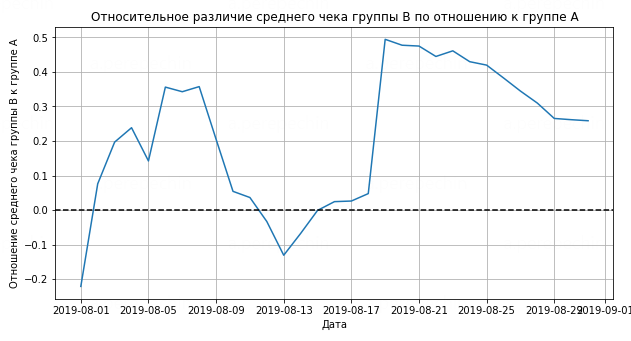

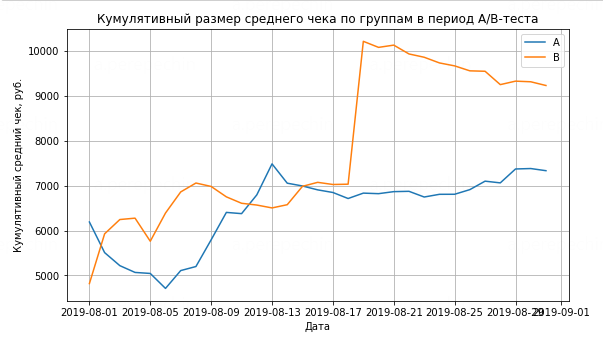

**Финальный вывод:** Группа В статистически значимо лучше группы А по среднему количеству заказов на одного пользователя.Этот показатель рос, немного уменьшался, но сейчас стабильно закрепился на отметке выше группы А. Это видно как по сырым, так и по очищенным данным.\
Статистически значимого различия в размере среднего чека нет. При этом по сырым данным показатель больше у группы В, а по очишенным - у группы А. Однако график имеет вид с резкими "перепадами" и сделать однозначный вывод не получится. 

Если нет различий в среднем чеке между группами, но среднее количество заказов на пользователя группы В превышает это количество для группы А - значит, тест можно признать успешным и остановить. Группа В победила в этом тесте.

# Заключение

Я начал исследование с предобработки данных о гипотезах, посещениях и заказах клиентов.\
В них не было обнаружено дублирующихся строк, ошибочных названий категорий и пропусков, что говорит о хорошем качестве данных.

Был получен список гипотез к реализации - я приоритизировал их, используя фреймворки ICE и RICE.\
В первом случае самой приоритетной гипотезой оказалась:\
*Запустить акцию, дающую скидку на товар в день рождения*
В случае оценки по фреймворку RICE:\
*Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок*

Такая разница в приоритете объясняется тем, что фреймворк RICE, в отличие от ICE, при расчёте учитывает охваты конечных пользователей, на которых будут влиять изменения.

После приоритизации я провел A/B-тест, после чего перешёл к исследованию его результатов.\
Я вычислил и визуализировал ряд метрик для каждой группы:
- кумулятивный средний чек
- кумулятивная выручка
- кумулятивное отношение среднего чека группы В к группе А
- кумулятивное среднее количество заказов на пользователя
- кумулятивное отношение кол-ва заказов на пользователя группы В к группе А

Эта визуализация позволила сделать важные выводы, которые я использовал при подведении итогов теста. В частости, группа В выигрывала по показателю среднего количества заказов относительно группы А.\
Кроме того, визуализация позволила выявить наличие аномалий.

На следующем шаге я проанализировал среднее кол-во заказов на пользователя, а также средний чек, на аномалии. Я использовал точечный график и подсчёт перцентилей, после чего определил границу аномалий: не более 2х заказов на одного пользователя, а стоимость одного заказа - не более 28 000 рублей. Эти границы я буду использовать при подсчете статистической значимости различий, чтобы провести анализ и по "сырым", и по "очищенным данным".

После этого перешёл непосредственно к посчёту статистической значимости различий между группами А и В по метрикам "среднее количество заказов на одного пользователя" и "средний чек". Сначала я вычислил эти метрики по сырым данным, а после этого - по очищенным.

Получил следующие выводы:
1. Есть статистически значимое различие в среднем количестве заказов на одного пользователя между группами. Это различие видно и по сырым, и по очищенным от аномалий данным. По сырым данным этот показатель у группы В больше, чем у группы А, на 16%, а по очищенным - больше на 19%.
2. Эта тенденция также подтверждается графиком отношения среднего кол-ва заказов группы В к группе А. Сначала группа В проигрывала, но к середине теста значительно превысила среднее кол-во по группе А. После этого уровень немного снизился, но в настоящий момент - снова растёт.
3. График кумулятивного среднего кол-ва заказов на одного пользователя по группам также показывает преимущество группы В, в начале проигрывая группе А, но к середине теста заметно превышая этот показатель для группы В.
4. Нет статистически значимого различия в размере среднего чека между группами. Это подтверждается как по сырым, так и по очищенным данным.
5. На графике относительного различия среднего чека заметно, что средний чек то превышал чек по группе А, то снова падал ниже. Во второй половине теста он снова начал падать у группы В, и сейчас продолжает снижаться.
6. На графике кумулятивного размера среднего чека группа В имела резкий рост среднего чека, однако это может быть связано с аномалиями в заказах.

**Финальный вывод** по результатам теста звучит так:\
Группа В статистически значимо лучше группы А по среднему количеству заказов на одного пользователя.Этот показатель рос, немного уменьшался, но сейчас стабильно закрепился на отметке выше группы А. Это видно как по сырым, так и по очищенным данным.\
Статистически значимого различия в размере среднего чека нет. При этом по сырым данным показатель больше у группы В, а по очишенным - у группы А. Однако график имеет вид с резкими "перепадами" и сделать однозначный вывод не получится. 

Таким образом, решение по A/B-тесту: тест можно **признать успешным и остановить**, поскольку нет различий в среднем чеке между группами, но среднее количество заказов на пользователя группы В заметно превышает это количество для группы А.\
Группа В победила в этом тесте.